<a href="https://colab.research.google.com/github/Xopppek/NuclearHackHah/blob/master/%223_hahatyrs_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Раскадровка видео с сохранением всех изображений в отдельную папку

In [40]:
from moviepy.editor import VideoFileClip
from datetime import timedelta
import numpy as np
import os
SAVING_FRAMES_PER_SECOND = 60
VIDEO_PATH_NAME = '/content/Endoscope_video_(8)' #name without .mp4 for dir name usage also

def format_timedelta(td):
  result = str(td)
  try:
     result, ms = result.split(".")
  except ValueError:
    return result+ ".00".replace(":","-")
  ms = round(int(ms)/10000)
  return f"{result}.{ms:02}".replace(":","-")

def main(video_file):
  video_clip = VideoFileClip(video_file)
  filename, _ = os.path.splitext(video_file)
  if not os.path.isdir(filename):
    os.mkdir(filename)
  saving_frames_per_second = 24
  #min(video_clip.fps, SAVING_FRAMES_PER_SECOND)
  #print(video_clip.fps)
  step = 1/ saving_frames_per_second

  for current_duration in np.arange(0, video_clip.duration, step):
    frame_duration_formatted = format_timedelta(timedelta(seconds = current_duration)).replace(":","-")
    frame_filename = os.path.join(filename, f"frame{frame_duration_formatted}.jpg")

    video_clip.save_frame(frame_filename,current_duration)


video_file = VIDEO_PATH_NAME + ".mp4"
main(video_file)

In [41]:
from os import walk
filenames = next(walk(VIDEO_PATH_NAME), (None, None, []))[2]
filenames.sort()
print(filenames)

['frame0-00-00.00.jpg', 'frame0-00-00.04.jpg', 'frame0-00-00.08.jpg', 'frame0-00-00.12.jpg', 'frame0-00-00.17.jpg', 'frame0-00-00.21.jpg', 'frame0-00-00.25.jpg', 'frame0-00-00.29.jpg', 'frame0-00-00.33.jpg', 'frame0-00-00.38.jpg', 'frame0-00-00.42.jpg', 'frame0-00-00.46.jpg', 'frame0-00-00.50.jpg', 'frame0-00-00.54.jpg', 'frame0-00-00.58.jpg', 'frame0-00-00.62.jpg', 'frame0-00-00.67.jpg', 'frame0-00-00.71.jpg', 'frame0-00-00.75.jpg', 'frame0-00-00.79.jpg', 'frame0-00-00.83.jpg', 'frame0-00-00.88.jpg', 'frame0-00-00.92.jpg', 'frame0-00-00.96.jpg', 'frame0-00-01.00.jpg', 'frame0-00-01.04.jpg', 'frame0-00-01.08.jpg', 'frame0-00-01.12.jpg', 'frame0-00-01.17.jpg', 'frame0-00-01.21.jpg', 'frame0-00-01.25.jpg', 'frame0-00-01.29.jpg', 'frame0-00-01.33.jpg', 'frame0-00-01.38.jpg', 'frame0-00-01.42.jpg', 'frame0-00-01.46.jpg', 'frame0-00-01.50.jpg', 'frame0-00-01.54.jpg', 'frame0-00-01.58.jpg', 'frame0-00-01.62.jpg', 'frame0-00-01.67.jpg', 'frame0-00-01.71.jpg', 'frame0-00-01.75.jpg', 'frame0-00

Преобразование круга на кадре в полосу

In [42]:
import PIL
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def print_line(drawing_line, filename):
  # Load the image
  image = cv2.imread(filename)

  height, width, _ = image.shape

  center_x = width // 2
  center_y = height // 2

  canvas = cv2.imread(filename)
  CIRCLE_RADIUS = 150
  CIRCLE_THICKNESS = 1
  CIRCLE_CENTER = (center_x, center_y)
  cv2.circle(canvas, CIRCLE_CENTER, CIRCLE_RADIUS, (0,0,255), CIRCLE_THICKNESS)

  cv2.imwrite("./debug.png", canvas)
  debug = cv2.imread("./debug.png")


  image2 = PIL.Image.open('/content/debug.png') #the image is opened and named image
  f = image2.load()
  #print(image2.size[0], image2.size[1])
  color = (255,0,0)
  PixelCoordinates = []
  for x in range (image2.size[0]):
      for y in range (image2.size[1]):
          if f[x,y] == color:
              PixelCoordinates.append([x,y])

  PixelCoordinates.sort(key=lambda x:x[1], reverse=True)


  x_avg = CIRCLE_CENTER[0]

  left_low_circle_part_coordinates = []
  right_low_circle_part_coordinates = []
  left_high_circle_part_coordinates = []
  right_high_circle_part_coordinates = []

  #print(x_avg)
  for pixel in PixelCoordinates:
    if pixel[0] < x_avg:
      if pixel[1] > CIRCLE_CENTER[1]:
        left_low_circle_part_coordinates.append(pixel)
      else:
        left_high_circle_part_coordinates.append(pixel)
    else:
      if pixel[1] > CIRCLE_CENTER[1]:
        right_low_circle_part_coordinates.append(pixel)
      else:
        right_high_circle_part_coordinates.append(pixel)

  left_low_circle_part_coordinates.sort(key=lambda x:x[0], reverse=True)
  left_high_circle_part_coordinates.sort(key=lambda x:x[0], reverse=False)
  right_low_circle_part_coordinates.sort(key=lambda x:x[0], reverse=False)
  right_high_circle_part_coordinates.sort(key=lambda x:x[0], reverse=True)

  map2d = cv2.imread("output_map.png");
  map2d = cv2.resize(map2d, (len(filenames), len(PixelCoordinates) + 15))
  #print(map2d.shape[0], map2d.shape[1])

  drawing_start_point = round(map2d.shape[0]/2)
  y = drawing_start_point
  for pixel in left_low_circle_part_coordinates:
    for i in range(3):
      map2d[y, drawing_line][i] = image[pixel[1], pixel[0]][i]
    y += 1
  for pixel in left_high_circle_part_coordinates:
    for i in range(3):
      map2d[y, drawing_line][i] = image[pixel[1], pixel[0]][i]
    y += 1
  y = drawing_start_point - 1
  for pixel in right_low_circle_part_coordinates:
    for i in range(3):
      map2d[y, drawing_line][i] = image[pixel[1], pixel[0]][i]
    y -= 1
  for pixel in right_high_circle_part_coordinates:
    for i in range(3):
      map2d[y, drawing_line][i] = image[pixel[1], pixel[0]][i]
    y -= 1

  cv2.imwrite("output_map.png", map2d)

Создание развертки трубы

In [46]:
drawing_line = 0
percent = -1
for file in filenames:
  last_percent = percent
  percent = round(drawing_line * 100 /len(filenames))
  if last_percent != percent and percent % 10 == 0:
    print("Writing... {}%".format(percent))
  print_line(drawing_line, VIDEO_PATH_NAME + "/" + file)
  drawing_line+=1
print()

Writing... 0%
Writing... 10%
Writing... 20%
Writing... 30%
Writing... 40%
Writing... 50%
Writing... 60%
Writing... 70%
Writing... 80%
Writing... 90%
Writing... 100%



In [ ]:
!rm -r Endoscope_video/

Очистка для следующего видео

In [ ]:
clearing = cv2.imread('/content/output_map.png')
for x in range(clearing.shape[0]):
  for y in range(clearing.shape[1]):
    for i in range(3):
      clearing[x, y][i] = 255
cv2.imwrite("/content/output_map.png", clearing)

In [ ]:
import cv2
import time
from PIL import Image
import matplotlib.pyplot as plt
# Загрузка видеофайла
video_path = 'Endoscope_video_11.mp4'
cap = cv2.VideoCapture(video_path)

# Получение информации о видео
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)
# Проход по каждому кадру видео
count = 0
X_memory = []
Y_memory = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Преобразование изображения в оттенки серого
    grayscale_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Применение Гауссового размытия
    grayscale_frame = cv2.GaussianBlur(grayscale_frame,(7,7),5)
    # Обрезание изображения, оставляем верхнюю половину
    #grayscale_frame = grayscale_frame[0:int(frame_height/2), 0:frame_width]
    #ImageShowFromArray(grayscale_frame)
    # Разбиваем пиксели на ч\б граница на 200
    _,thresh = cv2.threshold(grayscale_frame, 200, 1000, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    # Ищем контуры изображения
    contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
    # переводим изображение в белый (костыль)
    _,thresh = cv2.threshold(grayscale_frame, 255, 1000, cv2.ADAPTIVE_THRESH_GAUSSIAN_C)
    # рисуем контуры на исходном изображении
    # При этом сортируем контуры по размеру, возвращаем с самого маленького
    def custom_sort(countour):
        return countour.shape[0]
    contours=list(contours)
    contours.sort(key=custom_sort)
    # костыль для вывода конутров (можно убрать)
    sel_countour=contours[0]
    cv2.drawContours(image=thresh, contours=sel_countour, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    sel_countour=contours[1]
    cv2.drawContours(image=thresh, contours=sel_countour, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
    sel_countour=contours[2]
    cv2.drawContours(image=thresh, contours=sel_countour, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

    # Нахождение координат центров контуров
    X = []
    Y = []
    MaxDistanceBetweenPoints = 125
    UpperLimit = 75
    for i in range(3):
        moment = cv2.moments(contours[i])
        if((moment['m00']!=0.0) and (moment['m00']!=0.0)):
            x = int(moment['m10']/moment['m00'])
            y = int(moment['m01']/moment['m00'])
            if (y>UpperLimit):
                X.append(x)
                Y.append(y)
     #   print(X)
     #   print(Y)
        if (len(X)==2):
        #    print(np.sqrt((X[0]-X[1])**2+(Y[0]-Y[1])**2))
            if (np.sqrt((X[0]-X[1])**2+(Y[0]-Y[1])**2)<MaxDistanceBetweenPoints):
         #       print(1)
                break
            else:
                X.pop()
                Y.pop()
    if (len(X)==1):
        print('!!!!')
        for i in range(3):
            moment = cv2.moments(contours[i])
            if((moment['m00']!=0.0) and (moment['m00']!=0.0)):
                x = int(moment['m10']/moment['m00'])
                y = int(moment['m01']/moment['m00'])
                if(y>UpperLimit):
                    X.append(x)
                    Y.append(y)
         #   print(X)
         #   print(Y)
            if (len(X)==2):
            #    print(np.sqrt((X[0]-X[1])**2+(Y[0]-Y[1])**2))
                if (np.sqrt((X[0]-X[1])**2+(Y[0]-Y[1])**2)<MaxDistanceBetweenPoints):
             #       print(1)
                    break
                else:
                    X.pop(0)
                    Y.pop(0)

    X_memory = X
 #   print(X_memory)
    Y_memory = Y
    # вывод изображения
    color_converted = cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)
    pil_image=Image.fromarray(color_converted)
    plt.figure(figsize =(10,5))
    plt.imshow(pil_image) #показать изображение
    plt.scatter(X,Y,s=15,color = 'red')
    plt.show()
    #ImageShowFromArray(thresh)
    count+=1
# Освобождение ресурсов
cap.release()
out.release()
cv2.destroyAllWindows()

#[214.75  75.78]
#[512.56  75.03]

Код, позволяющий по пути файла избражения обозначить прямоугольники нахождение грязи, с помощью преобразования изображения в черно-белый вид


In [ ]:
plt.rcParams['image.cmap'] = 'gray'
def select_colorsp(img, colorsp='gray'):
    # Преобразование в оттенки серого.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Разделить BGR.
    red, green, blue = cv2.split(img)
    # Преобразовать в HSV.
    im_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Разделить HSV.
    hue, sat, val = cv2.split(im_hsv)
    # Записываем каналы в словаре.
    channels = {'gray':gray, 'red':red, 'green':green,
                'blue':blue, 'hue':hue, 'sat':sat, 'val':val}

    return channels[colorsp]

In [ ]:
def threshold(img, thresh=157, mode='inverse'):
    im = img.copy()

    if mode == 'direct':
        thresh_mode = cv2.THRESH_BINARY
    else:
        thresh_mode = cv2.THRESH_BINARY_INV

    ret, thresh = cv2.threshold(im, thresh, 255, thresh_mode)

    return thresh

In [ ]:
def get_bboxes(img):
    contours, hierarchy = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    # Сортировка по площади контуров в порядке убывания.
    sorted_cnt = sorted(contours, key=cv2.contourArea, reverse = True)
    # Удалите максимальную площадь, самый внешний контур.
    sorted_cnt.remove(sorted_cnt[0])
    bboxes = []
    for cnt in sorted_cnt:
        x,y,w,h = cv2.boundingRect(cnt)
        cnt_area = w * h
        bboxes.append((x, y, x+w, y+h))
    return bboxes
def draw_annotations(img, bboxes, thickness=2, color=(0,255,0)):
    annotations = img.copy()
    for box in bboxes:
        tlc = (box[0], box[1])
        brc = (box[2], box[3])
        cv2.rectangle(annotations, tlc, brc, color, thickness, cv2.LINE_AA)
        #image_new = cv2.addWeighted(annotations, 0.1, img, 0.9, 0)
    return annotations

In [ ]:
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):

        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)
    return 1 if brightness == 255 else brightness / scale
def thresh_finder(brightless):
  return 320*brightless
def display(im_left, im_right, name_l='Left', name_r='Right', figsize=(10,7)):

    # Переключайте каналы для отображения, если RGB как matplotlib требует RGB.
    im_l_dis = im_left[...,::-1]  if len(im_left.shape) > 2 else im_left
    im_r_dis = im_right[...,::-1] if len(im_right.shape) > 2 else im_right

    plt.figure(figsize=figsize)
    plt.subplot(121); plt.imshow(im_l_dis);
    plt.title(name_l); plt.axis(False);
    plt.subplot(122); plt.imshow(im_r_dis);
    plt.title(name_r); plt.axis(False);

In [ ]:
from PIL import Image
file_named = "путь до файла"
im = Image.open(file_named)


width, height = im.size
im_crop = im.crop((0,height/5, width,height*4/5))
im_crop.save('intermediate_picture_dust.jpg', quality=95)
#im_crop.save('ones.jpg', quality=95)
#im2 = Image.open('superpuper.jpg')

FileNotFoundError: ignored

In [ ]:
def result_for_dirt(file_named):
  im = Image.open(file_named)
  width, height = im.size
  im_crop = im.crop((0,height/5, width*4/5,height*4/5))
  im_crop.save('intermediate_picture_dust.jpg', quality=95)
  stags = cv2.imread('/content/intermediate_picture_dust.jpg')
  gray_st = select_colorsp(stags)
  thresh_st = threshold(gray_st, 170)
  bboxes = get_bboxes(thresh_st)
  ann_stags = draw_annotations(stags, bboxes, thickness=2, color=(0, 0,255))
  cv2.imwrite('/content/out_mapping/video_1.jpg', ann_stags)
  display(stags, ann_stags,
          name_l='Original infrared',
          name_r='Thresholded',
          figsize=(20,14))
  return 0

In [ ]:
stags = cv2.imread('/content/intermediate_picture_dust.jpg')
gray_st = select_colorsp(stags)
thresh_st = threshold(gray_st, 225)
bboxes = get_bboxes(thresh_st)
ann_stags = draw_annotations(stags, bboxes, thickness=2, color=(0, 0,255))
cv2.imwrite('/content/out_mapping/video_1.jpg', ann_stags)
display(stags, ann_stags,
        name_l='Original infrared',
        name_r='Thresholded',
        figsize=(20,14))

0

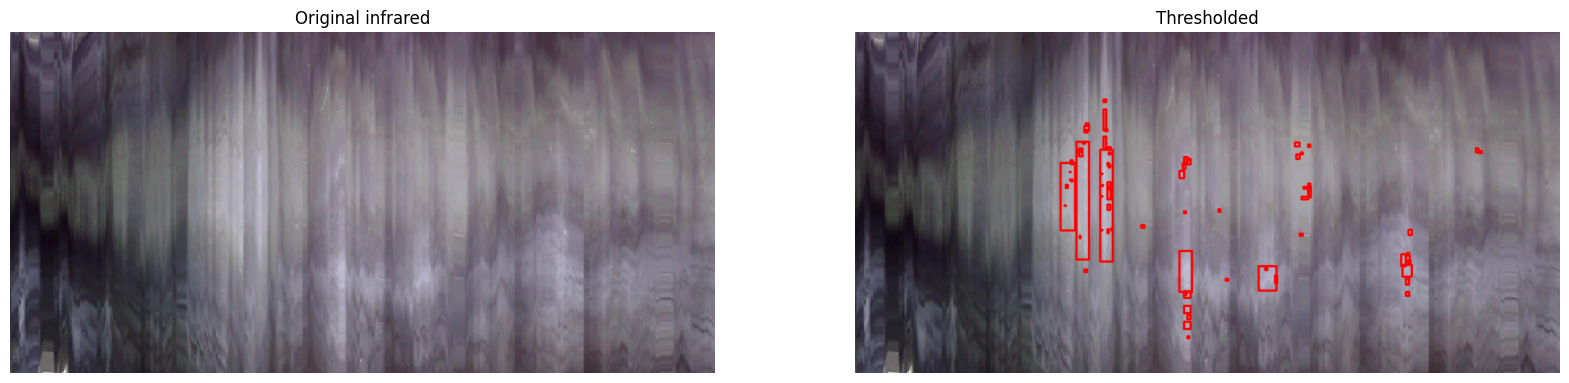

In [ ]:
result_for_dirt("/content/output_map.png")